In [2]:
import numpy as np
import matplotlib.pyplot as plt
%cd "/home/volkan/Repos/multi-tier"
from data_analysis.helpers import *

/home/volkan/Repos/multi-tier


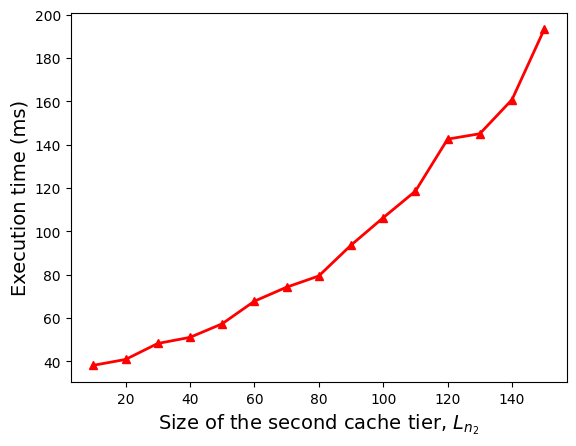

In [21]:
experiment_name = "some_cputime"
topology = "abilene"
config_path = "../sim_configs/some_config.json"
db_path = "../sim_outputs/some_cputime_abilene_db.json"
db = getJsonDb(db_path)

fig, ax = plt.subplots()
test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
cpu_times = getDataFieldSumAvgsAcrossSeeds(topology, db, input_param_list, [1], [1], "vip_caching_avg_time")
cpu_times = np.array(cpu_times)*1000
x_variant = list(map(tuple, test_config["cache_capacities"]))
x_variant = [x[1] for x in x_variant[1::]]
ax.plot(x_variant, cpu_times[1::], '-r^', linewidth=2)
ax.set_xlabel('Size of the second cache tier, $L_{n_2}$',fontsize=14)
ax.set_ylabel('Execution time (ms)',fontsize=14)
plt.savefig('../sim_outputs/vip_caching_comp_time_wrt_cache.pdf',bbox_inches='tight')

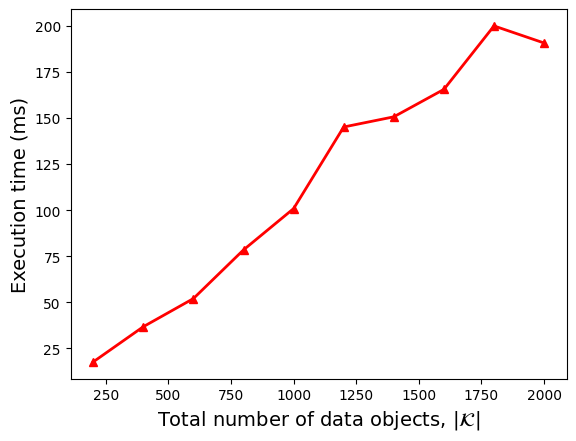

In [23]:
topology = "abilene"
config_path = "../sim_configs/some_config.json"
db_path = "../sim_outputs/some_cputime_obj_abilene_db.json"
db = getJsonDb(db_path)

fig, ax = plt.subplots()
test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
cpu_times = getDataFieldSumAvgsAcrossSeeds(topology, db, input_param_list, [1], [1], "vip_caching_avg_time")
cpu_times = np.array(cpu_times)*1000
ax.plot(test_config["num_objects"], cpu_times, '-r^', linewidth=2)
ax.set_xlabel('Total number of data objects, $|\mathcal{K}|$',fontsize=14)
ax.set_ylabel('Execution time (ms)',fontsize=14)
plt.savefig('../sim_outputs/vip_caching_comp_time_wrt_objects.pdf',bbox_inches='tight')

In [ ]:
experiment_name = "mt_cache_size_rate"
topology = "abilene"
# config_path = "../sim_configs/" + experiment_name + "_config.json"
config_path = "https://pastebin.com/raw/19aJNE91"
db_path = "./sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)


fig, ax = plt.subplots()


test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)
filters = [("cache_pol", "mvip", None), ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="vip")
print(list(map(tuple,test_config["cache_capacities"])))
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="mvip-25-5")

filters = [("cache_pol", "lfu", None),  ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="lfu-25-5")
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="lfu-25-5")

filters = [("cache_pol", "lru", None), ("cache_read_rates",(25,10),None)]
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
#ax.plot([5, 6, 7, 8, 9, 10, 11], res, label="lru")
ax.plot(list(map(str,test_config["cache_capacities"][1:])), res, label="lru-25-5")

ax.legend()

In [ ]:
experiment_name = "some"
topology = "abilene"
config_path = "./sim_configs/" + experiment_name + "_config.json"
db_path = "./sim_outputs/" + experiment_name + "_" + topology + "_db.json"
db = getJsonDb(db_path)
fig, ax = plt.subplots()
test_config = getTestConfig(config_path)
input_param_list = simConfigToParamSets(test_config)

filters = [("cache_pol", "mvip", None)]
filters.extend(
    [
        ("vip_inc", 1, None),
        ("vip_slot_len", 1, None),
        ("vip_win_size", 100, None),
        ("cache_capacities", (5, 100), None),
    ]
)
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
rpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_read_penalties",
)
wpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_write_penalties",
)
ax.plot(np.sum(rpen + wpen, axis=1), res, label="mvip")
# ax.plot(rpen+wpen, res, label="vip2")
# ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="vip2")

#filters = [("cache_pol", "palfu", None)]
filters = [("cache_pol", "mvip", None)]
filters.extend(
    [
        ("vip_inc", 1, None),
        ("vip_slot_len", 1, None),
        ("vip_win_size", 50, None),
        ("cache_capacities", (5, 100), None),
    ]
)
param_list = filterParamList(input_param_list, filters)
res = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "delay",
)
rpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_read_penalties",
)
wpen = getDataFieldSumAvgsAcrossSeeds(
    topology,
    db,
    param_list,
    test_config["source_map_seed"],
    test_config["request_generator_seed"],
    "cache_write_penalties",
)
ax.plot(np.sum(rpen + wpen, axis=1), res, label="mvip2")
# ax.plot(rpen+wpen, res, label="palfu")
# ax.plot([0,0.25,0.5,1,2,5,10,20], res, label="palfu")

ax.legend()

In [27]:
topology="abilene"
db_path = f"sim_outputs/some_{topology}_db.json"
db = getJsonDb(db_path)
db_keys = [db_key for db_key in db]
vip2_delay = singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[0]], "delay")
vipsbw_delay = singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[1]], "delay")
vipsbw2_delay = singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[2]], "delay")
print("VIP2 delay: ", vip2_delay)
print("VIPSBW delay: ", vipsbw_delay, "Ratio to VIP2: ", vipsbw_delay/vip2_delay)
print("VIPSBW2 delay: ", vipsbw2_delay, "Ratio to VIP2: ", vipsbw2_delay/vip2_delay)

VIP2 delay:  407122.48350541963
VIPSBW delay:  406041.2052509929 Ratio to VIP2:  0.9973440959459751
VIPSBW2 delay:  408810.8071639208 Ratio to VIP2:  1.0041469673793604


In [20]:
topology="abilene"
db_path = f"sim_outputs/sample_{topology}_db.json"
db = getJsonDb(db_path)
db_keys = [db_key for db_key in db]
mvip_delay = singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[0]], "delay")
mvipsbw2_delay = singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[1]], "delay")
#mvip_delay = np.array([singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[i]], "delay") for i in range(3)])
#mvipsbw2_delay = np.array([singleEntrySumDataFieldAcrossNodes(topology, db[db_keys[i]], "delay") for i in range(3,6)])
print("MVIP delay: ", mvip_delay)
print("MVIPSBW2 delay: ", mvipsbw2_delay, "Ratio to MVIP: ", mvipsbw2_delay/mvip_delay)

MVIP delay:  438765.28939746635
MVIPSBW2 delay:  431303.655059039 Ratio to MVIP:  0.9829940186274215
